# Experimentation with kMeans Clustering

- strip the str cols - "Cannibal Corpse "

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Recude-Dimenionality-with-PCA" data-toc-modified-id="Recude-Dimenionality-with-PCA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Recude Dimenionality with PCA</a></span></li><li><span><a href="#Apply-k-means-Clustering-and-evaluate-Silhouette-Scores" data-toc-modified-id="Apply-k-means-Clustering-and-evaluate-Silhouette-Scores-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Apply k-means Clustering and evaluate Silhouette Scores</a></span></li><li><span><a href="#Append-clusters-to-profile" data-toc-modified-id="Append-clusters-to-profile-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Append clusters to profile</a></span></li><li><span><a href="#EDA,-2" data-toc-modified-id="EDA,-2-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>EDA, 2</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd

from settings import collection_path, collection_cols, collection_genres, feature_list
from load import load_collection, create_albums_data

# my own custom functions
import EDA_functions as EDA

# visualization
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use(['default', 'raph-base'])
import seaborn as sns

from sklearn.preprocessing import minmax_scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
# collection = load_collection(collection_path, collection_cols, collection_genres)

In [3]:
# album_data = create_albums_data(collection, feature_list)

In [2]:
# # Save to csv
# album_data.to_csv("data/interim/album_data.csv", index=False)
# Load from csv
album_data = pd.read_csv("data/interim/album_data.csv")

In [3]:
# Check
album_data.sample(5)

,Artist,Title,danceability,energy,key,mode,instrumentalness,valence,tempo,loudness,duration_ms
59,Lifeless,The Occult Mastery,0.244444,0.857778,3.777778,0.444444,0.735556,0.152178,128.824556,-6.027111,247522.888889
83,Cannibal Corpse,Red Before Black,0.307500,0.985083,4.583333,0.916667,0.881000,0.160733,132.185417,-5.346917,232410.166667
97,Blood Incantation,Hidden History Of The Human Race,0.222750,0.864000,3.750000,0.250000,0.849500,0.134550,113.578000,-8.536500,543393.250000
12,Dismember,Indicent & Obscene,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
66,Skeletal Remains,Devouring Mortality,0.276545,0.965818,5.818182,0.636364,0.403727,0.176964,120.277545,-5.687364,243224.272727


In [4]:
# Remove the albums without data
album_data = album_data.loc[album_data['danceability'] > 0]

## EDA

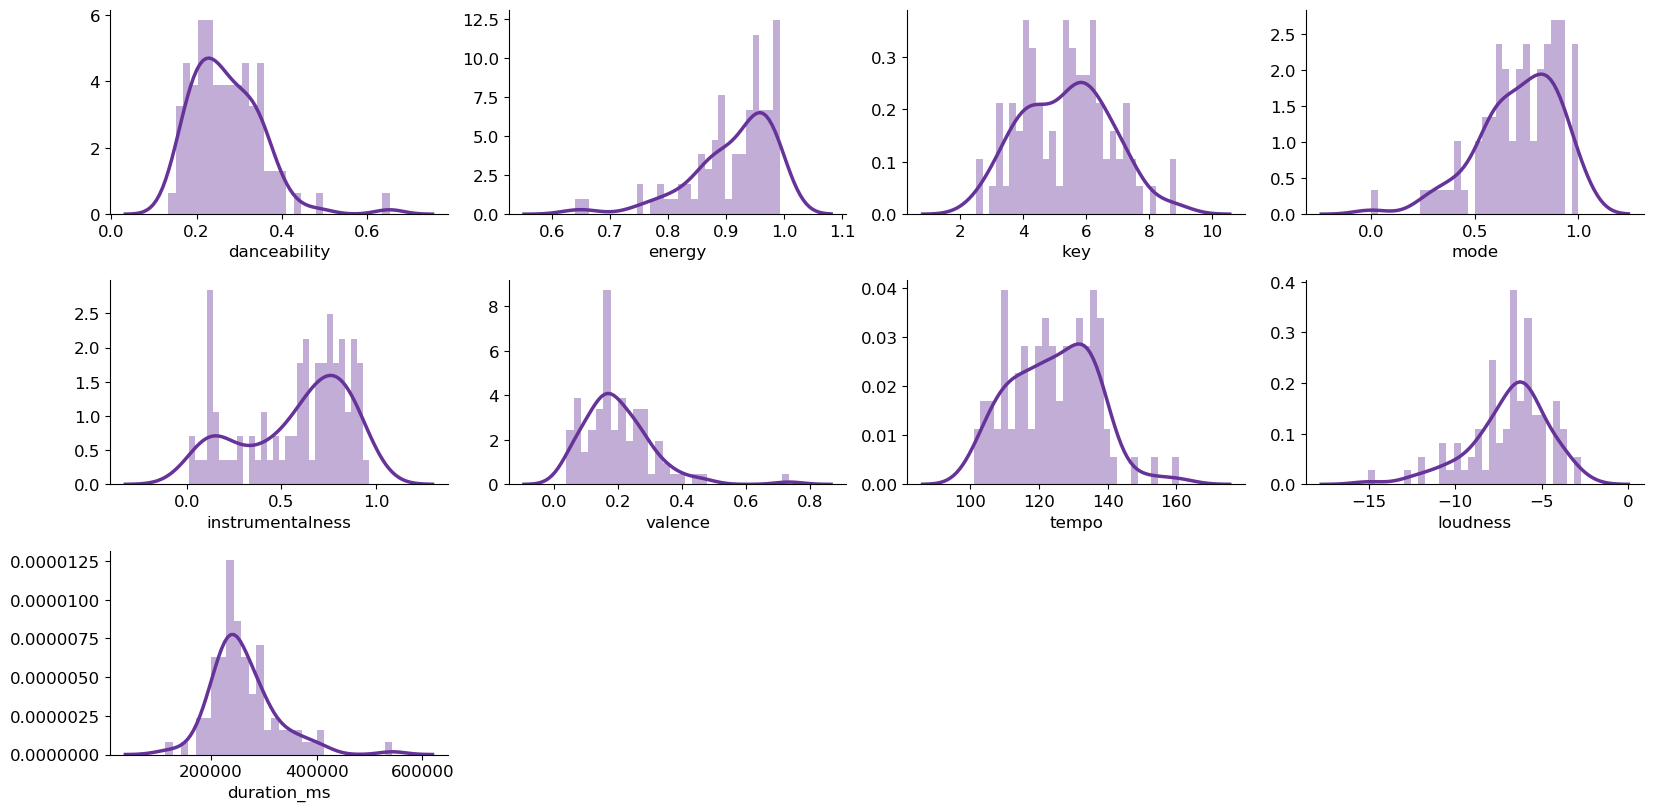

In [5]:
EDA.plot_num_hist(album_data, bins=30, figsize=(16,8))

In [6]:
for col in album_data.columns[2:]:
    print(f"{col}:")
    display(album_data[["Artist", "Title", col]].nlargest(5, col))
    display(album_data[["Artist", "Title", col]].nsmallest(5, col))

danceability:


,Artist,Title,danceability
28,Vampire,Vampire,0.652273
93,Fulci,Tropical Sun,0.487286
60,Discreation,Procreation Of The Wretched,0.429900
38,Benediction,Killing Music,0.405200
56,Requiem,Global Resistance Rising,0.394100


,Artist,Title,danceability
87,Witch Vomit,Buried Deep In A Bottomless Grave,0.133714
67,Corpsessed,Impetus of Death,0.152037
89,Sempiternal Dusk,Cenotaph of Defectuous Creation,0.157000
53,Vomitory,Raped In Their Own Blood,0.159715
69,Necrot,Blood Offerings,0.159988


energy:


,Artist,Title,energy
60,Discreation,Procreation Of The Wretched,0.992300
74,Carnation,Chapel Of Abhorrence,0.992273
52,Vomitory,Redemption,0.991308
56,Requiem,Global Resistance Rising,0.991300
44,Entrails,Raging Death,0.990400


,Artist,Title,energy
28,Vampire,Vampire,0.639364
82,Petrification,Hollow of The Void,0.657936
40,Vanhelgd,Temple Of Phobos,0.749000
78,Ghastly,Death Velour,0.749157
32,Fleshcrawl,Descend Into The Absurd,0.775778


key:


,Artist,Title,key
49,Deicide,Legion,8.875000
85,Cannibal Corpse,Tomb Of The Mutilated,8.700000
7,Hypocrisy,End Of Disclosure,8.100000
43,Deicide,Deicide,7.600000
92,Gatecreeper,Sonoran Depravation,7.444444


,Artist,Title,key
56,Requiem,Global Resistance Rising,2.500000
93,Fulci,Tropical Sun,2.642857
26,At The Gates,The Red In The Sky Is Ours,3.000000
50,Immolation,Dawn Of Possession,3.200000
86,Devourment,Obscene Majesty,3.200000


mode:


,Artist,Title,mode
22,Entombed,Left Hand Path,1.0
25,Asphyx,Death … The Brutal Way,1.0
28,Vampire,Vampire,1.0
36,Deserted Fear,My Empire,1.0
47,Morfin,Consumed By Evil,1.0


,Artist,Title,mode
7,Hypocrisy,End Of Disclosure,0.000000
97,Blood Incantation,Hidden History Of The Human Race,0.250000
41,Deserted Fear,Dead Shores Rising,0.272727
44,Entrails,Raging Death,0.300000
91,Cerebral Rot,Odious Descent Into Decay,0.333333


instrumentalness:


,Artist,Title,instrumentalness
88,Coffins,Beyond The Circular Demise,0.962375
63,Rude,Remnants …,0.928111
90,Incantation,Upon The Throne of Apocalypse,0.924125
65,Skinless,Savagery,0.917700
27,At The Gates,With Fear I Kiss The Burning Darkness,0.915455


,Artist,Title,instrumentalness
6,Entombed,Morning Star,0.012328
42,Bloodbath,Nightmares Made Flesh,0.025119
57,Keitzer,Ascension,0.064088
15,Cannibal Corpse,Eaten Back To Life,0.093479
28,Vampire,Vampire,0.113493


valence:


,Artist,Title,valence
28,Vampire,Vampire,0.735000
11,Entombed,Wolverine Blues,0.472000
94,Cannabis Corpse,From Wisdom To Baked,0.450727
49,Deicide,Legion,0.406288
47,Morfin,Consumed By Evil,0.383811


,Artist,Title,valence
57,Keitzer,Ascension,0.038267
74,Carnation,Chapel Of Abhorrence,0.050518
79,Fetid,Steeping Corporeal Mess,0.052300
53,Vomitory,Raped In Their Own Blood,0.059385
23,Tribulation,The Formulas Of Death,0.061045


tempo:


,Artist,Title,tempo
36,Deserted Fear,My Empire,160.649500
91,Cerebral Rot,Odious Descent Into Decay,153.256556
46,Fatalist,The Bitter End,147.375000
78,Ghastly,Death Velour,142.110429
11,Entombed,Wolverine Blues,139.746800


,Artist,Title,tempo
76,Imprecation,Damnatio Ad Bestias,101.020625
67,Corpsessed,Impetus of Death,102.162750
25,Asphyx,Death … The Brutal Way,103.151800
68,Blood Incantation,Starspawn,103.492200
40,Vanhelgd,Temple Of Phobos,104.929286


loudness:


,Artist,Title,loudness
25,Asphyx,Death … The Brutal Way,-2.706300
56,Requiem,Global Resistance Rising,-2.789700
71,Tomb Mold,Primordial Malignity,-3.695250
60,Discreation,Procreation Of The Wretched,-3.792500
51,Bloodbath,Grand Morbid Funeral,-3.859273


,Artist,Title,loudness
82,Petrification,Hollow of The Void,-15.018182
50,Immolation,Dawn Of Possession,-12.687200
32,Fleshcrawl,Descend Into The Absurd,-12.101889
48,Malevolent Creation,The Ten Commandments,-11.875000
15,Cannibal Corpse,Eaten Back To Life,-10.909636


duration_ms:


,Artist,Title,duration_ms
97,Blood Incantation,Hidden History Of The Human Race,543393.250000
68,Blood Incantation,Starspawn,412010.600000
23,Tribulation,The Formulas Of Death,409566.090909
79,Fetid,Steeping Corporeal Mess,387517.200000
40,Vanhelgd,Temple Of Phobos,378198.285714


,Artist,Title,duration_ms
77,Deathgrave,"So Real, It's Now",113601.857143
93,Fulci,Tropical Sun,143853.000000
20,Obituary,Slowly We Rot,173444.857143
39,Hierophant,Mass Grave,184018.600000
6,Entombed,Morning Star,185098.916667


**Observation:** Vampire's self-titled album is a strong outlier for energy and valence. As it is not a typical album representing my collection I will remove it for the fitting of the data.

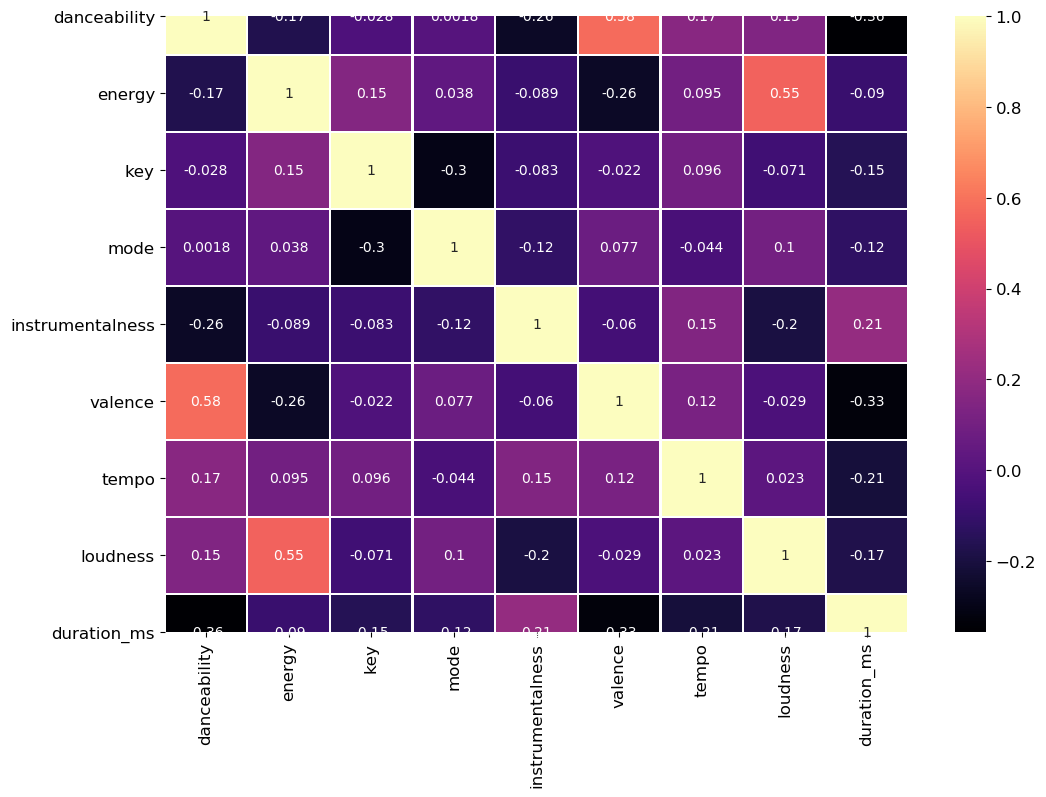

In [7]:
# Check for high correlations
EDA.plot_corr_map_num_all(album_data, figsize=(12, 8))

**Observation:** No strong correlations to be taken care of.

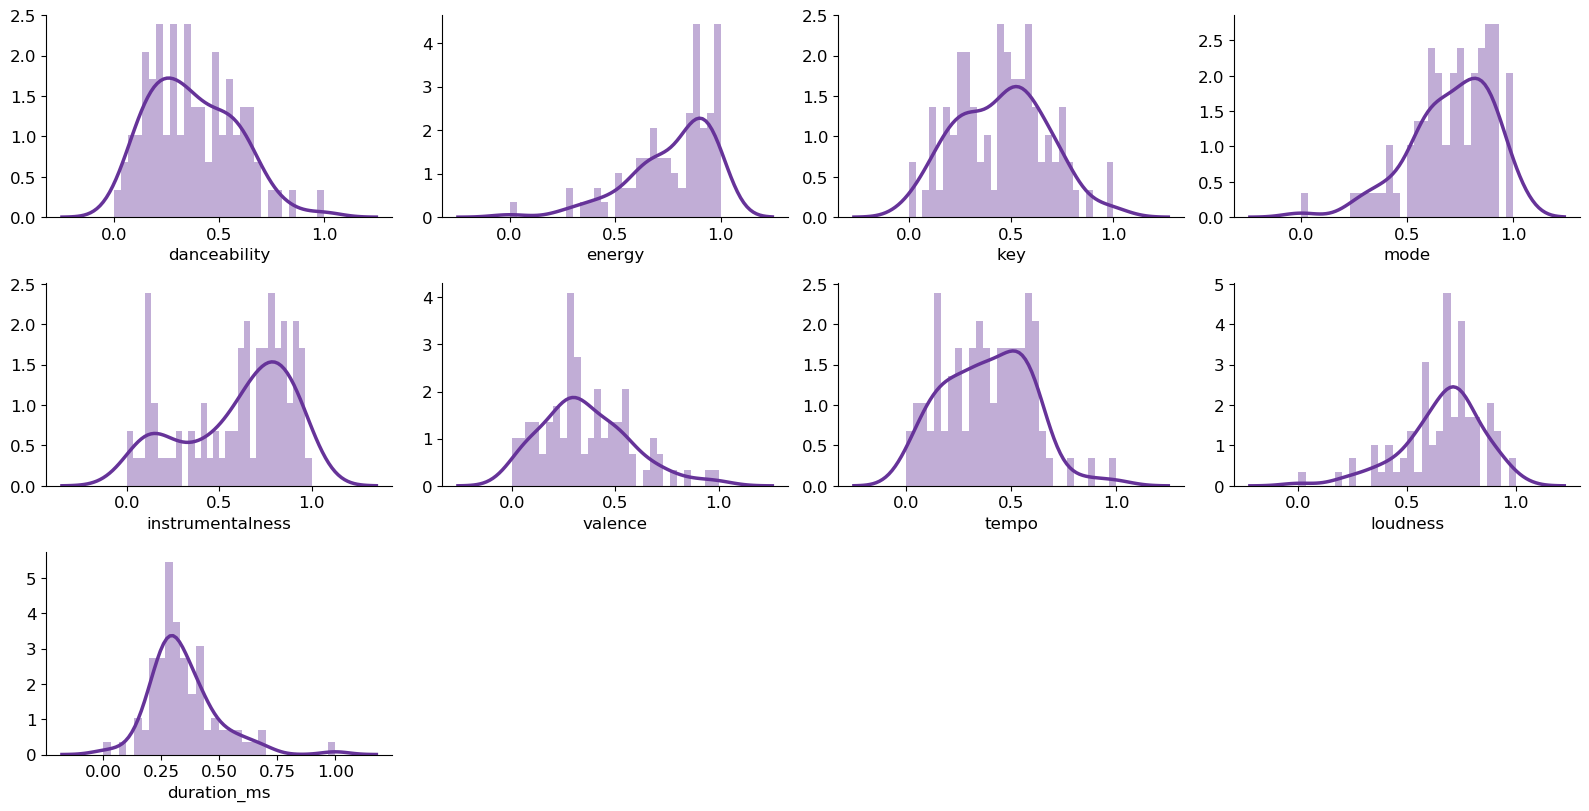

In [8]:
"""scale data to range (0,1)"""

# Remove outlier
album_data = album_data.loc[album_data['Title'] != "Vampire"]
album_data.reset_index(drop=True, inplace=True)

scaled_data = minmax_scale(album_data.iloc[:, 2:])
scaled_data = pd.DataFrame(scaled_data, columns=album_data.columns[2:])

# check results
EDA.plot_num_hist(scaled_data, bins=30, figsize=(16, 8))

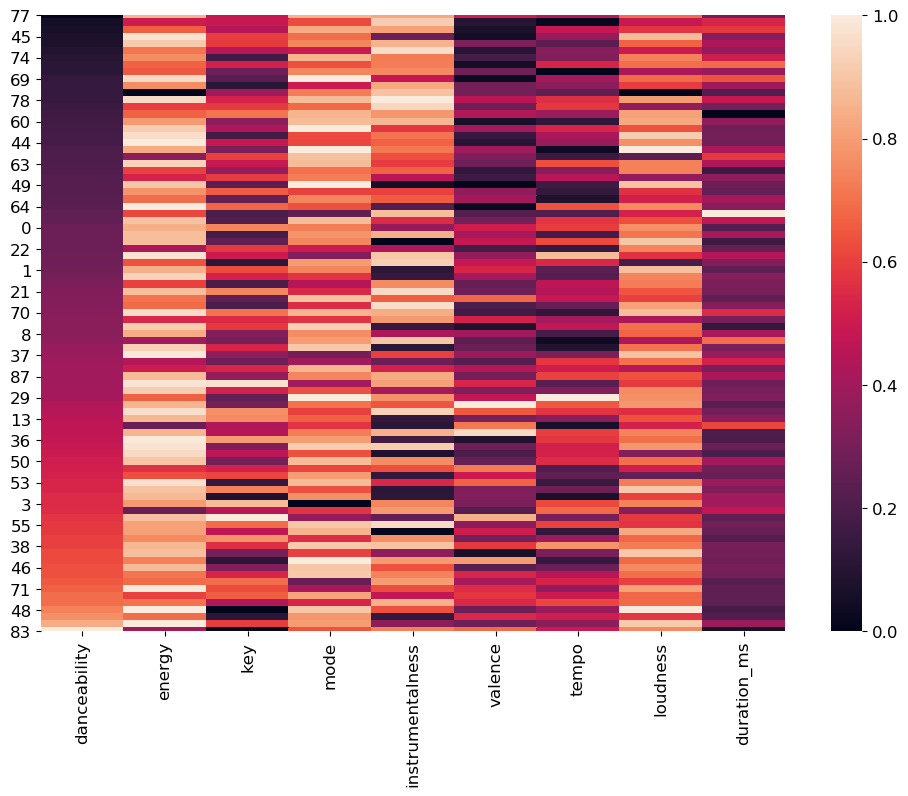

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(scaled_data.sort_values('danceability'))

## Recude Dimenionality with PCA

In [10]:
""" apply PCA with the goal to retain 95% of the variance"""

# initialize pca class object
pca = PCA(n_components=0.95) # PCA(n_components=bc_profile.shape[1])

# define function to apply pca and visualize the results
def pca_results(df, pca):
    ''' Create a DataFrame of the PCA results that includes dimension feature 
    weights and explained variance and visusalize the results with a bar chart.

    ARGUMENTS:
        - df: dataframe
        - pca: fitted sklearn PCA class object
        
    RETURNS:
        - pca_results: dataframe with pca results
        - Plot of PCA results (bar chart)
    '''
    
    pca.fit(df)

    # index dimensions, pca components, explained variance
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(df.keys()))
    components.index = dimensions
    
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # create a bar plot visualization: plot feature weights as function of components
    fig, ax = plt.subplots(figsize = (18,12))

    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)
    plt.legend(loc='lower right')

    # display explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n%.4f"%(ev))

    # return concatenated DataFrame
    pca_results = pd.concat([variance_ratios, components], axis = 1)
    pca_results

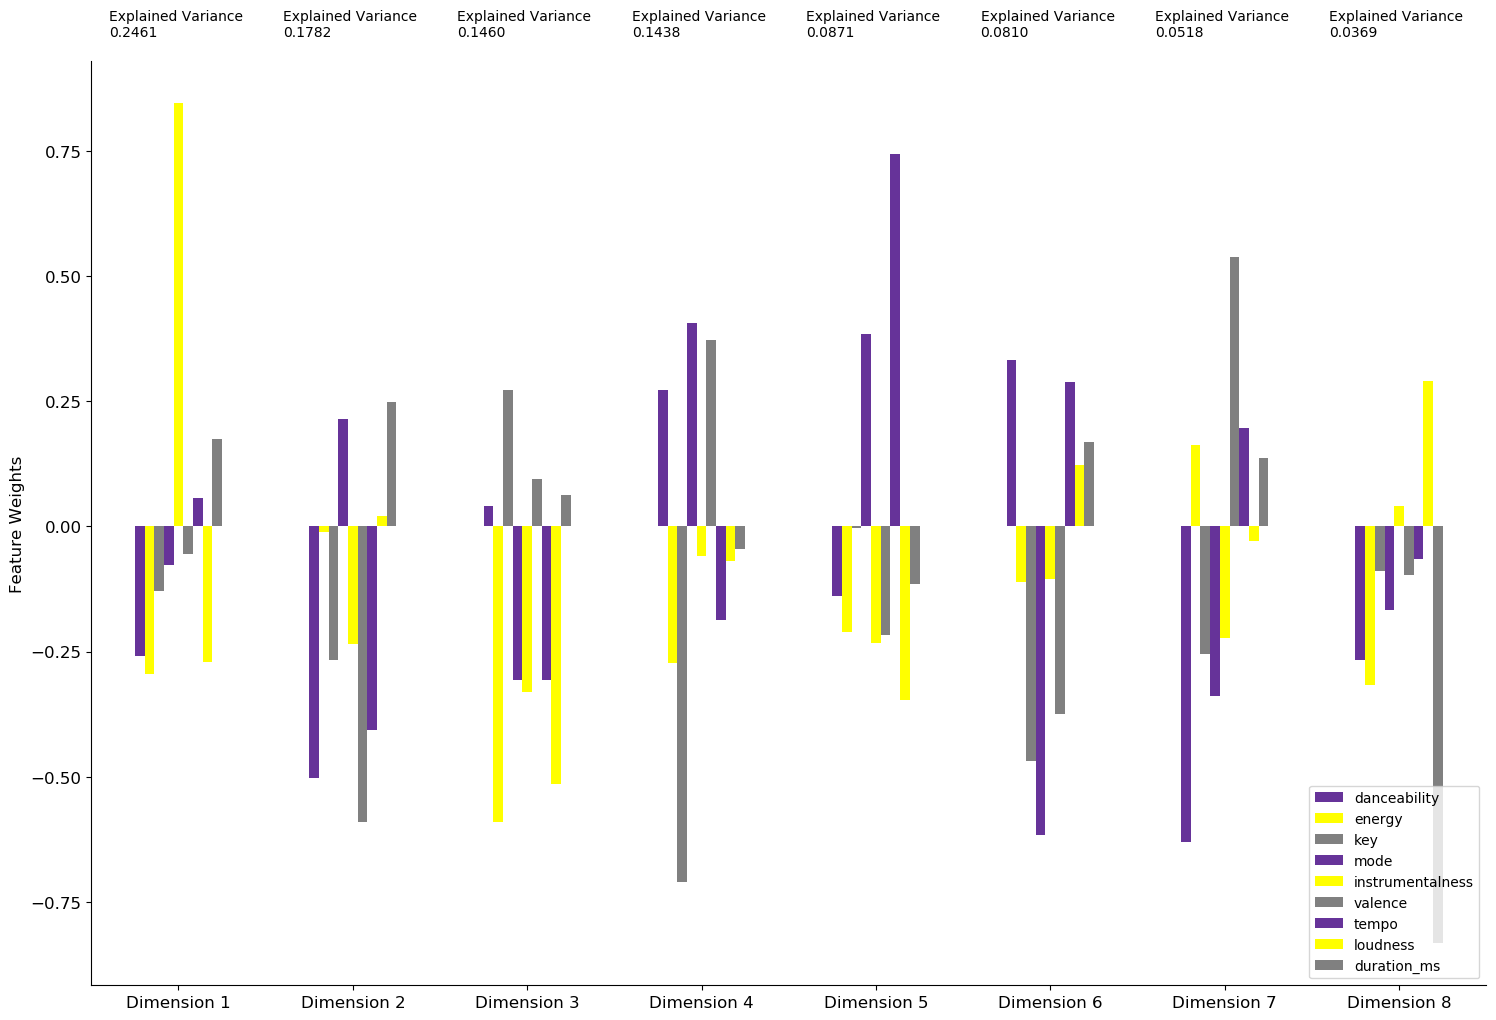

In [11]:
# call function
pca_results(scaled_data, pca)

In [12]:
"""def function to visualize pca-reduction"""

def create_biplot(orig_df, reduced_df, pca):
    '''Create a biplot that shows a scatterplot of the reduced
    data and the projections of the original features.

    ARGUMENTS:
        - orig_df: dataframe before pca-transformation with column names
        - reduced_df: dataframe after pca-transformation (the first 2D are plotted)
        - pca: sklearn PCA object that contains the components_ attribute

    RETURNS:
        - a matplotlib AxesSubplot object (for any additional customization)

    This procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot
    '''

    fig, ax = plt.subplots(figsize = (18,12))

    # scatterplot of the reduced data    
    ax.scatter(x=reduced_df.loc[:, 'Dimension 1'], y=reduced_df.loc[:, 'Dimension 2'], 
        facecolors='rebeccapurple', edgecolors='w', s=100, alpha=0.8)

    # scaling factors to make the arrows easier to see
    arrow_size, text_pos = 1, 1

    # projections of the original features
    feature_vectors = pca.components_.T
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.1, head_length=0.1, linewidth=2, color='lightseagreen')
        ax.text(v[0]*text_pos, v[1]*text_pos, orig_df.columns[i], color='black', 
                 ha='center', va='bottom', fontsize=16)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);

    return ax

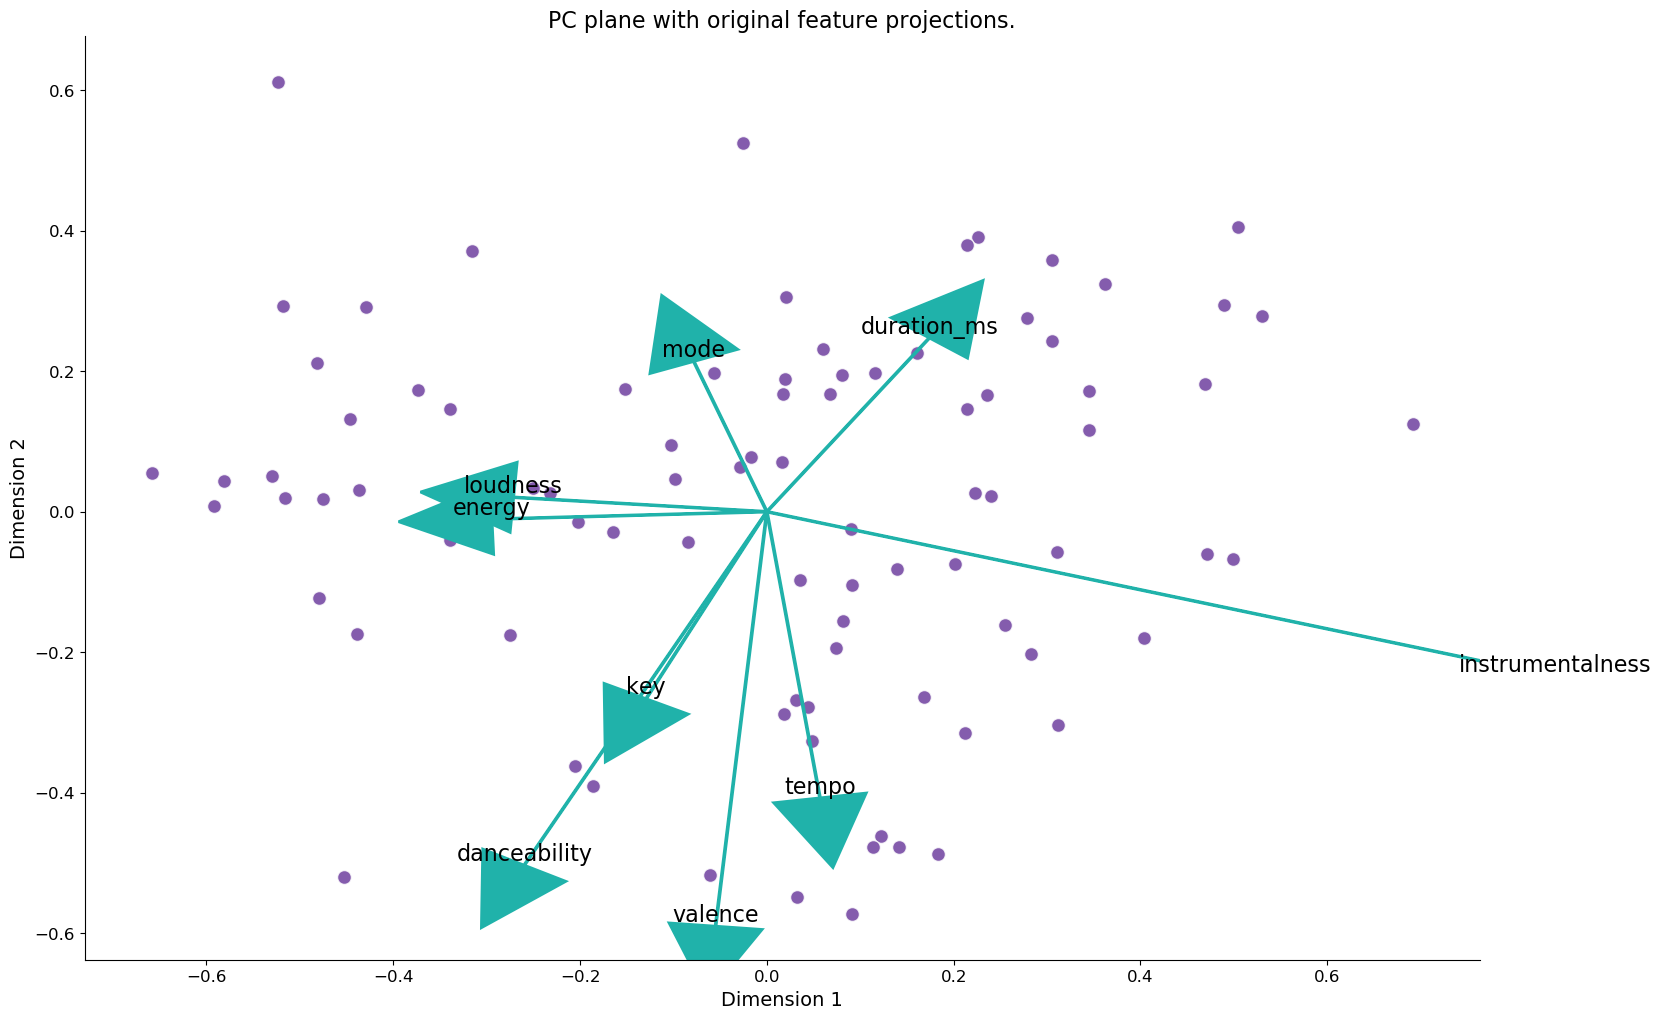

In [13]:
pca_2 = PCA(n_components=2)
reduced_data = pca_2.fit_transform(scaled_data)
reduced_data = pd.DataFrame(reduced_data, columns=['Dimension 1', 'Dimension 2'])

# call function
create_biplot(scaled_data, reduced_data, pca_2);

## Apply k-means Clustering and evaluate Silhouette Scores


In [14]:
pca_3 = PCA(n_components=3)
pca_4 = PCA(n_components=4)
pca_5 = PCA(n_components=5)
pca_6 = PCA(n_components=6)

reduced_data_2 = pca_2.fit_transform(scaled_data)
reduced_data_3 = pca_3.fit_transform(scaled_data)
reduced_data_4 = pca_4.fit_transform(scaled_data)
reduced_data_5 = pca_5.fit_transform(scaled_data)
reduced_data_6 = pca_6.fit_transform(scaled_data)

# range of cluster numbers to be tested
cluster_range = [3, 4, 5, 6, 7]

In [15]:
# define function to apply k-means to the reduced data, output silhouette score for different cluster numbers

def print_silhouette_kmeans(df, cluster_range):
    """Print silhouette scores for k-means clustering with sklearn.
    
    ARGUMENTS:
    - df: dataframe, containing the presumed clusters
    - cluster_range: list of integers with desired number of clusters
    
    RETURNS:
    - sil_scores: dict, containing the number of clusters and corresponding
    silhouette scores
    """
    
    sil_scores = {}

    for nc in cluster_range:
        kmeans = KMeans(n_clusters=nc)   
        kmeans.fit(df)

        # predict the cluster for each data point
        preds = kmeans.predict(df)
        # calculate the mean silhouette coefficient for the number of clusters chosen
        score = silhouette_score(df, preds)
        # append to dict
        sil_scores[nc] = score

    return sil_scores

In [16]:
sil_2 = print_silhouette_kmeans(reduced_data_2, cluster_range=cluster_range)
# check results
display(sil_2)

{3: 0.43794227408028,
 4: 0.3871963510476643,
 5: 0.3925966577652948,
 6: 0.38469143980481635,
 7: 0.3673912166879361}

In [17]:
sil_3 = print_silhouette_kmeans(reduced_data_3, cluster_range=cluster_range)
# check results
display(sil_3)

{3: 0.31419613237905303,
 4: 0.3324391333965708,
 5: 0.33336061874339395,
 6: 0.30489295789471155,
 7: 0.28166257644814385}

In [18]:
sil_4 = print_silhouette_kmeans(reduced_data_4, cluster_range=cluster_range)
# check results
display(sil_4)

{3: 0.2387051377094876,
 4: 0.24007443933172465,
 5: 0.27210719332432765,
 6: 0.27116297410606066,
 7: 0.2553637238673247}

In [19]:
sil_5 = print_silhouette_kmeans(reduced_data_5, cluster_range=cluster_range)
# check results
display(sil_5)

{3: 0.20971737416026268,
 4: 0.21905861797795642,
 5: 0.22279986089689385,
 6: 0.2175684784435666,
 7: 0.1749064366862609}

In [20]:
sil_6 = print_silhouette_kmeans(reduced_data_6, cluster_range=cluster_range)
# check results
display(sil_6)

{3: 0.18843185599845255,
 4: 0.18542302762691856,
 5: 0.19447789899581405,
 6: 0.18450990393366917,
 7: 0.17200392227634534}

**Observations:** 5 clusters seems to be a good number, as expected the lower the dimensionality, the higher the scores. I will compare the results for some of the lower dimensionalities

## Append clusters to profile

In [21]:
# fit kmeans and predict the cluster for each data point
kmeans = KMeans(n_clusters=5)   
preds_2 = kmeans.fit_predict(reduced_data_2)

# safety-check: calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data_2, preds_2)
print(score)

0.3925966577652948


In [22]:
# fit kmeans and predict the cluster for each data point
kmeans = KMeans(n_clusters=5)   
preds_3 = kmeans.fit_predict(reduced_data_3)

# safety-check: calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data_3, preds_3)
print(score)

0.33290766632990737


In [23]:
# fit kmeans and predict the cluster for each data point
kmeans = KMeans(n_clusters=5)   
preds_4 = kmeans.fit_predict(reduced_data_4)

# safety-check: calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data_4, preds_4)
print(score)

0.2708903554296649


In [24]:
for n_dim, preds in enumerate([preds_2, preds_3, preds_4],start=2):
    assert len(preds) == scaled_data.shape[0] # safety-check
    album_data[f'cluster_{n_dim}'] = preds + 1

In [26]:
album_data.sample(5)

,Artist,Title,danceability,energy,key,mode,instrumentalness,valence,tempo,loudness,duration_ms,cluster_2,cluster_3,cluster_4
28,Therion,Of Darkness …,0.214500,0.890250,4.166667,0.750000,0.639500,0.215675,105.969250,-8.629750,289802.250000,1,2,1
30,Deserted Fear,Kingdom Of Worms,0.378418,0.859909,6.727273,0.818182,0.462027,0.289264,130.722455,-6.670818,218534.545455,5,1,5
31,Benediction,Killing Music,0.405200,0.889929,3.214286,0.785714,0.143035,0.272786,131.228071,-7.871357,202793.428571,2,5,5
64,Carnation,Chapel Of Abhorrence,0.217909,0.992273,6.818182,0.636364,0.218655,0.050518,139.186000,-5.711818,260094.636364,2,5,3
70,Tomb Mold,Manor of Infinite Forms,0.254286,0.978286,7.000000,0.857143,0.807429,0.112557,108.673286,-4.191857,351216.000000,1,4,2


In [31]:
for cluster in album_data["cluster_2"].unique():
    print(cluster)
    print(sorted(album_data.loc[album_data["cluster_2"] == cluster]['Artist'].to_list()))

2
['At The Gates', 'Benediction', 'Bloodbath', 'Bloodbath', 'Cannibal Corpse ', 'Carnation', 'Death', 'Deicide', 'Discreation', 'Entombed', 'Entombed', 'Keitzer', 'Malevolent Creation', 'Merciless', 'Obituary', 'Obituary', 'Obituary', 'Requiem', 'Skeletal Remains', 'Vanhelgd', 'Vomitory', 'Weak Aside']
5
['Cannabis Corpse', 'Cannibal Corpse ', 'Cannibal Corpse ', 'Cannibal Corpse ', 'Death', 'Deicide', 'Deserted Fear', 'Deserted Fear', 'Deserted Fear', 'Entombed', 'Fatalist', 'Fulci', 'Gatecreeper', 'Gatecreeper', 'Hypocrisy']
1
['Asphyx', 'Blood Of Seklusion', 'Death', 'Death', 'Entombed', 'Entrails', 'Extremity', 'Fetid', 'Grotesque', 'Gruesome', 'Hierophant', 'Skeletal Remains', 'Therion', 'Tomb Mold', 'Tomb Mold', 'Tribulation', 'Vampire', 'Vomitory']
3
['At The Gates', 'Cannibal Corpse ', 'Cerebral Rot', 'Coffins', 'Deathgrave', 'Decaying', 'Demigod ', 'Deserted Fear', 'Edge Of Sanity', 'Evocation', 'Genocide Pact', 'Ghastly', 'Grave', 'Immolation', 'Lifeless', 'Morfin', 'Skinless

In [32]:
for cluster in album_data["cluster_3"].unique():
    print(cluster)
    print(sorted(album_data.loc[album_data["cluster_3"] == cluster]['Artist'].to_list()))

5
['At The Gates', 'Benediction', 'Bloodbath', 'Bloodbath', 'Cannibal Corpse ', 'Carnation', 'Death', 'Death', 'Deicide', 'Discreation', 'Entombed', 'Entombed', 'Keitzer', 'Merciless', 'Obituary', 'Obituary', 'Obituary', 'Skeletal Remains', 'Vomitory', 'Weak Aside']
1
['At The Gates', 'Cannabis Corpse', 'Cannibal Corpse ', 'Cannibal Corpse ', 'Cannibal Corpse ', 'Cerebral Rot', 'Deathgrave', 'Deserted Fear', 'Deserted Fear', 'Deserted Fear', 'Deserted Fear', 'Entombed', 'Evocation', 'Fatalist', 'Fulci', 'Gatecreeper', 'Gatecreeper', 'Grave', 'Hypocrisy', 'Morfin', 'Skinless']
3
['Death', 'Death', 'Deicide', 'Edge Of Sanity', 'Grotesque', 'Malevolent Creation', 'Tribulation', 'Vampire', 'Vanhelgd']
4
['Asphyx', 'Blood Of Seklusion', 'Cannibal Corpse ', 'Coffins', 'Decaying', 'Entombed', 'Entombed', 'Entrails', 'Extremity', 'Fetid', 'Genocide Pact', 'Gruesome', 'Hierophant', 'Lifeless', 'Mortuous', 'Necrot', 'Requiem', 'Rude', 'Skeletal Remains', 'Tomb Mold', 'Tomb Mold', 'Tomb Mold', 'V

In [33]:
for cluster in album_data["cluster_4"].unique():
    print(cluster)
    print(sorted(album_data.loc[album_data["cluster_4"] == cluster]['Artist'].to_list()))

3
['At The Gates', 'Bloodbath', 'Bloodbath', 'Cannibal Corpse ', 'Carnation', 'Death', 'Death', 'Deicide', 'Discreation', 'Entombed', 'Entombed', 'Keitzer', 'Malevolent Creation', 'Merciless', 'Obituary', 'Obituary', 'Obituary', 'Skeletal Remains', 'Vomitory', 'Weak Aside']
4
['At The Gates', 'Cannibal Corpse ', 'Cannibal Corpse ', 'Cannibal Corpse ', 'Cerebral Rot', 'Deicide', 'Deserted Fear', 'Deserted Fear', 'Gatecreeper', 'Hypocrisy', 'Skinless']
1
['Blood Incantation', 'Blood Incantation', 'Corpsessed', 'Death', 'Death', 'Demigod ', 'Edge Of Sanity', 'Evocation', 'Fleshcrawl', 'Ghastly', 'Grotesque', 'Immolation', 'Imprecation', 'Petrification', 'Therion', 'Tribulation', 'Vampire', 'Vanhelgd']
5
['Benediction', 'Cannabis Corpse', 'Deserted Fear', 'Deserted Fear', 'Entombed', 'Fatalist', 'Fulci', 'Gatecreeper', 'Grave', 'Morfin', 'Requiem', 'Skeletal Remains']
2
['Asphyx', 'Blood Of Seklusion', 'Cannibal Corpse ', 'Coffins', 'Deathgrave', 'Decaying', 'Devourment', 'Entombed', 'Ento

**Check:** Can I find configurations for Death and Gruesome to be in the same cluster? And Cannibal Corpse and Cannabis Corpse?

## EDA, 2

In [31]:
# Prepare comparision df

comp_df = album_data[["Artist", "Title", "cluster_2", "cluster_3", "cluster_4"]] 
comp_df = pd.concat([comp_df, scaled_data], axis=1, join="inner")
assert len(comp_df) == len(album_data)

In [32]:
scaled_data.index

RangeIndex(start=0, stop=88, step=1)

In [33]:
comp_df.loc[comp_df["Artist"].isin(["Death", "Gruesome"])]

,Artist,Title,cluster_2,cluster_3,cluster_4,danceability,energy,key,mode,instrumentalness,valence,tempo,loudness,duration_ms
4,Death,Human,4,5,5,0.519076,0.565809,0.523409,0.612245,0.630440,0.719573,0.208153,0.511855,0.277537
5,Death,Individual Thought Patterns,2,2,3,0.300175,0.934018,0.526611,0.571429,0.146322,0.404242,0.224988,0.743984,0.342425
7,Death,Scream Bloody Gore,5,5,5,0.224525,0.780778,0.658824,0.600000,0.603898,0.365025,0.138749,0.568230,0.260432
8,Death,Spiritual Healing,5,2,3,0.346599,0.838100,0.328665,0.761905,0.427703,0.400339,0.182104,0.673965,0.417140
62,Gruesome,Twisted Prayers,5,3,4,0.252879,0.892557,0.215686,0.875000,0.551206,0.286601,0.575105,0.630087,0.480375


In [34]:
comp_df.loc[comp_df["Artist"].isin(["Cannibal Corpse ", "Cannabis Corpse"])]

,Artist,Title,cluster_2,cluster_3,cluster_4,danceability,energy,key,mode,instrumentalness,valence,tempo,loudness,duration_ms
9,Cannibal Corpse,Eaten Back To Life,2,2,3,0.499100,0.950163,0.463458,0.636364,0.085418,0.202128,0.524264,0.333706,0.198364
10,Cannibal Corpse,Butchered At Birth,4,4,1,0.451636,0.967401,0.768627,0.600000,0.932872,0.648863,0.571515,0.560579,0.298733
71,Cannibal Corpse,Torture,4,4,1,0.664512,0.989632,0.627451,0.416667,0.628132,0.552490,0.364897,0.810627,0.247227
73,Cannibal Corpse,Red Before Black,1,3,4,0.491515,0.978417,0.326797,0.916667,0.914346,0.282355,0.522646,0.785523,0.276433
75,Cannibal Corpse,Tomb Of The Mutilated,4,4,1,0.402141,0.978467,0.972549,0.400000,0.801194,0.537043,0.229838,0.587366,0.284568
84,Cannabis Corpse,From Wisdom To Baked,4,4,2,0.472360,0.856090,0.449198,0.727273,0.848895,0.950954,0.597186,0.739825,0.204605


---